In [1]:
#Lab2 Fahad Saad Almoeili 2230004459 8MA1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sample_image(image, factor):

    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image


In [4]:
def quantize_image(image, levels):

    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image


In [5]:
def plot_images(original, sampled, quantized):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()


In [6]:
image_path='C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/images.jpg'
sampling_factor=14
quantization_levels=9

In [7]:
# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

In [8]:
# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

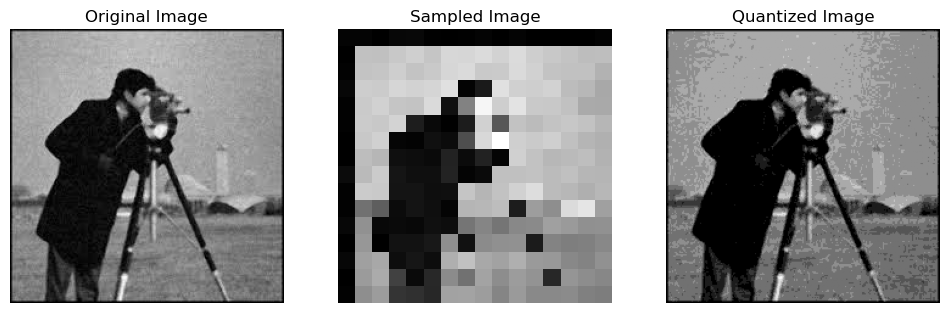

In [9]:
# Plot results
plot_images(original_image, sampled_image, quantized_image)

In [14]:
from PIL import Image
import numpy as np

img1 = Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/lena_gray_256.jpg').convert('L')
img2 = Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/images.jpg').convert('L')

resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

im1arr = np.asarray(img1)
im2arr = np.asarray(img2)

addition = im1arr + im2arr
resultImage = Image.fromarray(addition)
resultImage.show()

In [15]:
img3=Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/mountain.png')
img3.show()
img4=Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/screws.png')
img4.show()

resize=(400,400)
img3=img3.resize(resize,Image.Resampling.LANCZOS)
img4=img4.resize(resize,Image.Resampling.LANCZOS)

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

union=im4arr|im3arr
resultImage2=Image.fromarray(union)
resultImage2.show()

In [16]:
#task1

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sample_image(image, factor):
    height, width = image.shape[:2]
    return cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)

def quantize_image(image, levels):
    quantized = np.floor(image / (256 // levels)) * (256 // levels)
    return quantized.astype(np.uint8)

image_path = 'C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/images.jpg'
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

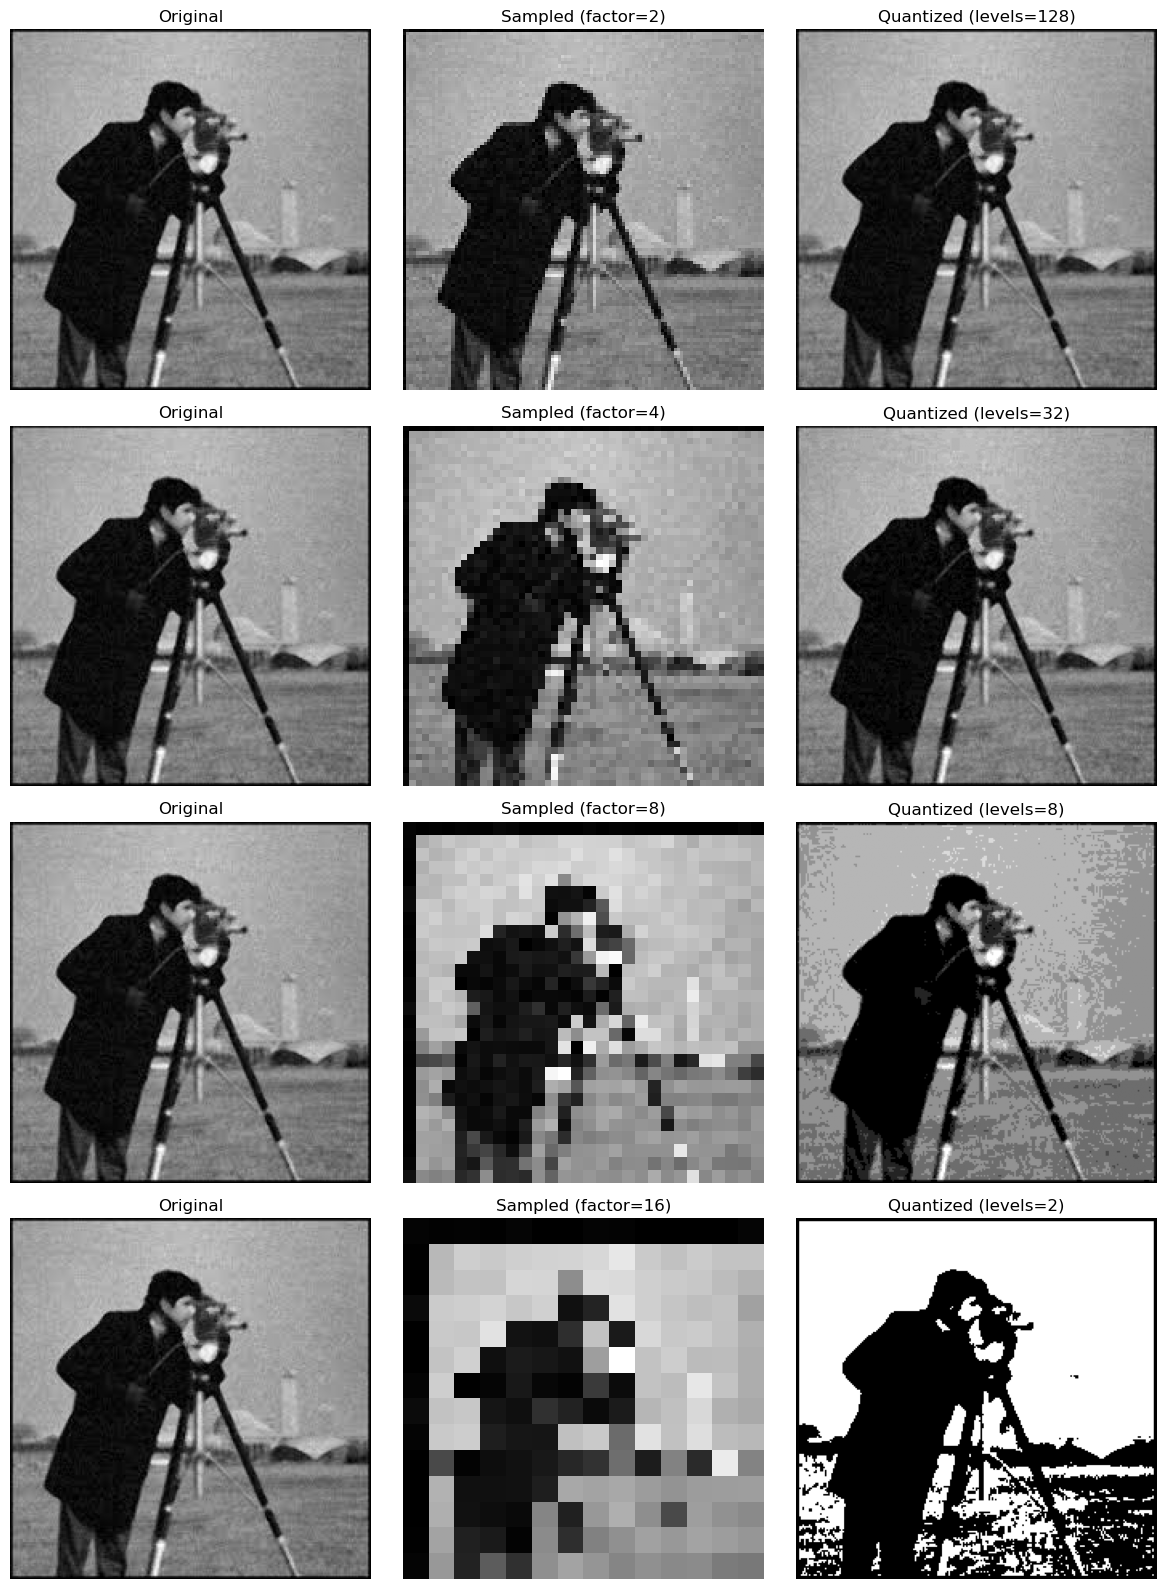

In [24]:
# Try different parameters and observe the effects
params = [
    (2, 128),   # mild downsampling, many gray levels
    (4, 32),    # moderate downsampling, fewer levels
    (8, 8),     # heavy downsampling, very few levels
    (16, 2),    # extreme downsampling, binary-like
]

fig, axes = plt.subplots(len(params), 3, figsize=(12, 16))

for i, (factor, levels) in enumerate(params):
    sampled = sample_image(original, factor)
    quantized = quantize_image(original, levels)

    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sampled, cmap='gray')
    axes[i, 1].set_title(f'Sampled (factor={factor})')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(quantized, cmap='gray')
    axes[i, 2].set_title(f'Quantized (levels={levels})')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [20]:
#task2

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert both images to grayscale
img1 = Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/A.jpg').convert('L')
img2 = Image.open('C:/Users/fssm0/OneDrive/Desktop/Jupyter IP/B.png').convert('L')

# Resize to same dimensions
resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

im1arr = np.asarray(img1).astype(np.uint16)
im2arr = np.asarray(img2).astype(np.uint16)

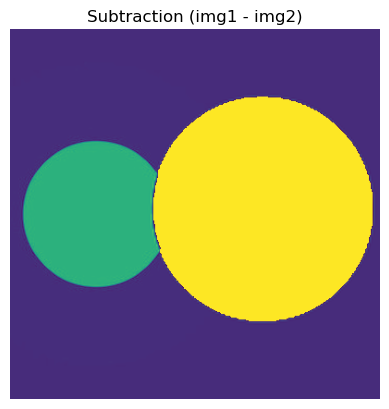

In [39]:
#1.	Subtract two images and display the result.
subtraction = np.clip(im1arr - im2arr, 0, 255).astype(np.uint8)

plt.imshow(subtraction)
plt.title('Subtraction (img1 - img2)')
plt.axis('off')
plt.show()

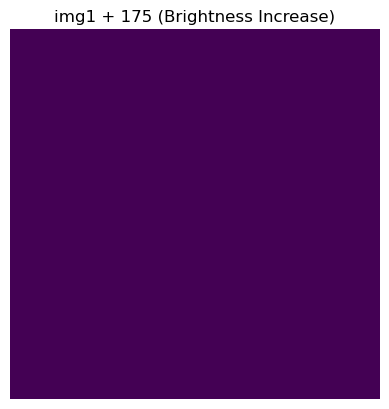

In [40]:
#2.	Add one image with a constant value of 175 and display it.
addition_constant = np.clip(im1arr + 175, 0, 255).astype(np.uint8)

plt.imshow(addition_constant)
plt.title('img1 + 175 (Brightness Increase)')
plt.axis('off')
plt.show()

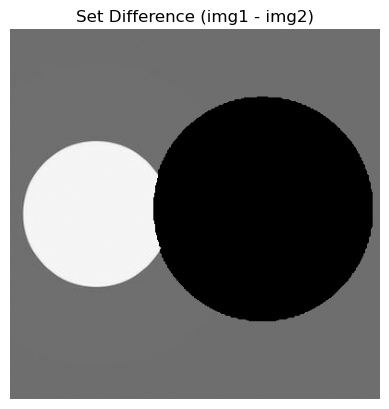

In [45]:
#3.	Apply the set difference operation on two Gray-Scale images. 
# A - B: keep pixels where img1 > img2, else 0
set_difference = np.where(im1arr > im2arr, im1arr, 0).astype(np.uint8)

plt.imshow(set_difference, cmap='gray')
plt.title('Set Difference (img1 - img2)')
plt.axis('off')
plt.show()

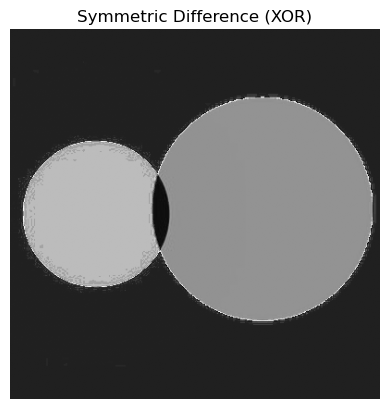

In [44]:
#4.	Apply the symmetric difference operation on two Gray-Scale images. 
sym_difference = (im1arr.astype(np.uint8) ^ im2arr.astype(np.uint8))

plt.imshow(sym_difference, cmap='gray')
plt.title('Symmetric Difference (XOR)')
plt.axis('off')
plt.show()

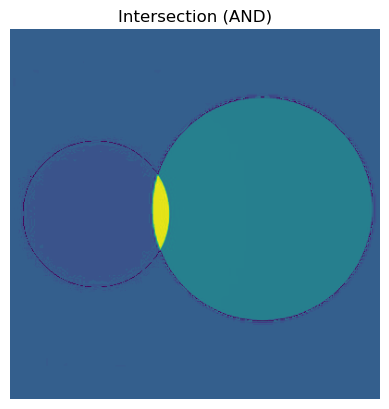

In [43]:
#5.	Apply Intersection operations on two Gray-Scale images.
intersection = (im1arr.astype(np.uint8) & im2arr.astype(np.uint8))

plt.imshow(intersection)
plt.title('Intersection (AND)')
plt.axis('off')
plt.show()